# Random Forest

Random Forest algorithm is a powerful tree learning technique in Machine Learning. It works by creating a number of Decision Trees during the training phase. Each tree is constructed using a random subset of the data set to measure a random subset of features in each partition. This randomness introduces variability among individual trees, reducing the risk of overfitting and improving overall prediction performance. In prediction, the algorithm aggregates the results of all trees, either by voting (for classification tasks) or by averaging (for regression tasks) This collaborative decision-making process, supported by multiple trees with their insights, provides an example stable and precise results. Random forests are widely used for classification and regression functions, which are known for their ability to handle complex data, reduce overfitting, and provide reliable forecasts in different environments.

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

In [21]:
data = pd.read_csv('/content/drive/MyDrive/data/penguins.csv', index_col = 0)
data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181,3750,male,2007
1,Adelie,Torgersen,39.5,17.4,186,3800,female,2007
2,Adelie,Torgersen,40.3,18.0,195,3250,female,2007
3,Adelie,Torgersen,36.7,19.3,193,3450,female,2007
4,Adelie,Torgersen,39.3,20.6,190,3650,male,2007
...,...,...,...,...,...,...,...,...
328,Chinstrap,Dream,55.8,19.8,207,4000,male,2009
329,Chinstrap,Dream,43.5,18.1,202,3400,female,2009
330,Chinstrap,Dream,49.6,18.2,193,3775,male,2009
331,Chinstrap,Dream,50.8,19.0,210,4100,male,2009


In [22]:
data['species'].unique()

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         333 non-null    int64  
 1   species            333 non-null    object 
 2   island             333 non-null    object 
 3   bill_length_mm     333 non-null    float64
 4   bill_depth_mm      333 non-null    float64
 5   flipper_length_mm  333 non-null    int64  
 6   body_mass_g        333 non-null    int64  
 7   sex                333 non-null    object 
 8   year               333 non-null    int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 23.5+ KB


In [23]:
y = data['species']

In [24]:
y = y.map({'Adelie': 0, 'Gentoo':1, 'Chinstrap':2})

In [25]:
y

0      0
1      0
2      0
3      0
4      0
      ..
328    2
329    2
330    2
331    2
332    2
Name: species, Length: 333, dtype: int64

In [26]:
X = data.iloc[:, 1:]

In [27]:
X

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Torgersen,39.1,18.7,181,3750,male,2007
1,Torgersen,39.5,17.4,186,3800,female,2007
2,Torgersen,40.3,18.0,195,3250,female,2007
3,Torgersen,36.7,19.3,193,3450,female,2007
4,Torgersen,39.3,20.6,190,3650,male,2007
...,...,...,...,...,...,...,...
328,Dream,55.8,19.8,207,4000,male,2009
329,Dream,43.5,18.1,202,3400,female,2009
330,Dream,49.6,18.2,193,3775,male,2009
331,Dream,50.8,19.0,210,4100,male,2009


In [28]:
X['sex'] = X['sex'].map({'male':0,'female':1})
X

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Torgersen,39.1,18.7,181,3750,0,2007
1,Torgersen,39.5,17.4,186,3800,1,2007
2,Torgersen,40.3,18.0,195,3250,1,2007
3,Torgersen,36.7,19.3,193,3450,1,2007
4,Torgersen,39.3,20.6,190,3650,0,2007
...,...,...,...,...,...,...,...
328,Dream,55.8,19.8,207,4000,0,2009
329,Dream,43.5,18.1,202,3400,1,2009
330,Dream,49.6,18.2,193,3775,0,2009
331,Dream,50.8,19.0,210,4100,0,2009


In [29]:
X['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [30]:
df_encoded = pd.get_dummies(X, columns = ['island'])

In [31]:
df_encoded

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,island_Biscoe,island_Dream,island_Torgersen
0,39.1,18.7,181,3750,0,2007,False,False,True
1,39.5,17.4,186,3800,1,2007,False,False,True
2,40.3,18.0,195,3250,1,2007,False,False,True
3,36.7,19.3,193,3450,1,2007,False,False,True
4,39.3,20.6,190,3650,0,2007,False,False,True
...,...,...,...,...,...,...,...,...,...
328,55.8,19.8,207,4000,0,2009,False,True,False
329,43.5,18.1,202,3400,1,2009,False,True,False
330,49.6,18.2,193,3775,0,2009,False,True,False
331,50.8,19.0,210,4100,0,2009,False,True,False


In [32]:
X = df_encoded

In [33]:
X, y

(     bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  sex  year  \
 0              39.1           18.7                181         3750    0  2007   
 1              39.5           17.4                186         3800    1  2007   
 2              40.3           18.0                195         3250    1  2007   
 3              36.7           19.3                193         3450    1  2007   
 4              39.3           20.6                190         3650    0  2007   
 ..              ...            ...                ...          ...  ...   ...   
 328            55.8           19.8                207         4000    0  2009   
 329            43.5           18.1                202         3400    1  2009   
 330            49.6           18.2                193         3775    0  2009   
 331            50.8           19.0                210         4100    0  2009   
 332            50.2           18.7                198         3775    1  2009   
 
      island_B

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 1)

In [35]:
random = RandomForestClassifier(n_estimators = 20, random_state = 100)
random.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20, random_state=100)

In [36]:
random.score(X_train, y_train)

1.0

In [37]:
decision = tree.DecisionTreeClassifier(max_depth = 3, random_state = 1)
decision.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

In [38]:
decision.score(X_train, y_train)

0.9887218045112782

In [39]:
decision.score(X_test, y_test)

0.9253731343283582

[Text(0.5416666666666666, 0.875, 'x[2] <= 207.5\ngini = 0.638\nsamples = 266\nvalue = [118, 93, 55]'),
 Text(0.3333333333333333, 0.625, 'x[0] <= 43.05\ngini = 0.43\nsamples = 169\nvalue = [117, 1, 51]'),
 Text(0.16666666666666666, 0.375, 'x[1] <= 16.65\ngini = 0.017\nsamples = 114\nvalue = [113, 0, 1]'),
 Text(0.08333333333333333, 0.125, 'gini = 0.198\nsamples = 9\nvalue = [8, 0, 1]'),
 Text(0.25, 0.125, 'gini = 0.0\nsamples = 105\nvalue = [105, 0, 0]'),
 Text(0.5, 0.375, 'x[7] <= 0.5\ngini = 0.168\nsamples = 55\nvalue = [4, 1, 50]'),
 Text(0.4166666666666667, 0.125, 'gini = 0.375\nsamples = 4\nvalue = [3, 1, 0]'),
 Text(0.5833333333333334, 0.125, 'gini = 0.038\nsamples = 51\nvalue = [1, 0, 50]'),
 Text(0.75, 0.625, 'x[1] <= 17.65\ngini = 0.099\nsamples = 97\nvalue = [1, 92, 4]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 92\nvalue = [0, 92, 0]'),
 Text(0.8333333333333334, 0.375, 'x[0] <= 46.55\ngini = 0.32\nsamples = 5\nvalue = [1, 0, 4]'),
 Text(0.75, 0.125, 'gini = 0.0

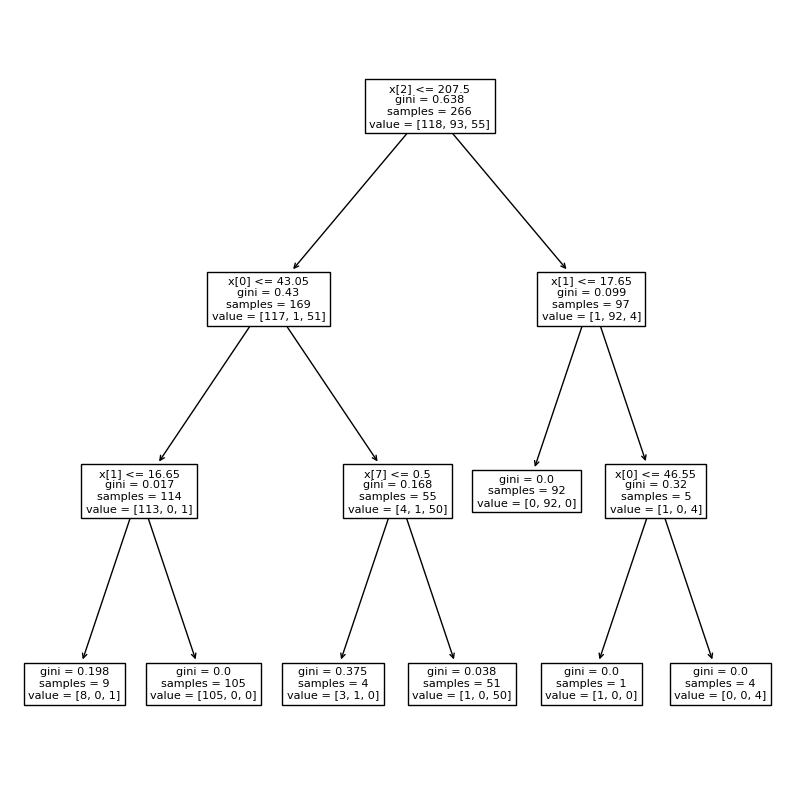

In [40]:
plt.figure(figsize = (10, 10))
tree.plot_tree(decision)

In [42]:
random.estimators_

[DecisionTreeClassifier(max_features='sqrt', random_state=186422792),
 DecisionTreeClassifier(max_features='sqrt', random_state=735107864),
 DecisionTreeClassifier(max_features='sqrt', random_state=1195587395),
 DecisionTreeClassifier(max_features='sqrt', random_state=1769725799),
 DecisionTreeClassifier(max_features='sqrt', random_state=1823289175),
 DecisionTreeClassifier(max_features='sqrt', random_state=113311823),
 DecisionTreeClassifier(max_features='sqrt', random_state=1480802224),
 DecisionTreeClassifier(max_features='sqrt', random_state=638252938),
 DecisionTreeClassifier(max_features='sqrt', random_state=20267358),
 DecisionTreeClassifier(max_features='sqrt', random_state=673068980),
 DecisionTreeClassifier(max_features='sqrt', random_state=522135394),
 DecisionTreeClassifier(max_features='sqrt', random_state=800870453),
 DecisionTreeClassifier(max_features='sqrt', random_state=733361730),
 DecisionTreeClassifier(max_features='sqrt', random_state=902405858),
 DecisionTreeClas

[Text(0.625, 0.9166666666666666, 'x[2] <= 207.5\ngini = 0.631\nsamples = 161\nvalue = [115, 103, 48]'),
 Text(0.4166666666666667, 0.75, 'x[0] <= 43.35\ngini = 0.4\nsamples = 97\nvalue = [115, 1, 42]'),
 Text(0.25, 0.5833333333333334, 'x[1] <= 16.7\ngini = 0.017\nsamples = 68\nvalue = [114, 0, 1]'),
 Text(0.16666666666666666, 0.4166666666666667, 'x[0] <= 40.45\ngini = 0.198\nsamples = 5\nvalue = [8, 0, 1]'),
 Text(0.08333333333333333, 0.25, 'gini = 0.0\nsamples = 4\nvalue = [8, 0, 0]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.3333333333333333, 0.4166666666666667, 'gini = 0.0\nsamples = 63\nvalue = [106, 0, 0]'),
 Text(0.5833333333333334, 0.5833333333333334, 'x[6] <= 0.5\ngini = 0.09\nsamples = 29\nvalue = [1, 1, 41]'),
 Text(0.5, 0.4166666666666667, 'x[0] <= 46.1\ngini = 0.046\nsamples = 28\nvalue = [1, 0, 41]'),
 Text(0.4166666666666667, 0.25, 'x[3] <= 4175.0\ngini = 0.245\nsamples = 5\nvalue = [1, 0, 6]'),
 Text(0.3333333333333333, 0.08333333333333333,

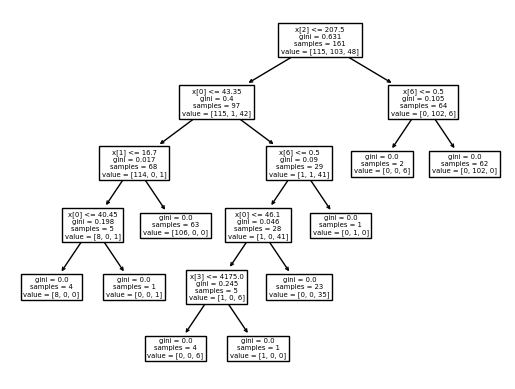

In [44]:
tree.plot_tree(random.estimators_[1])

[Text(0.6995192307692307, 0.95, 'x[2] <= 202.5\ngini = 0.626\nsamples = 167\nvalue = [121, 98, 47]'),
 Text(0.47596153846153844, 0.85, 'x[7] <= 0.5\ngini = 0.375\nsamples = 103\nvalue = [120, 0, 40]'),
 Text(0.4375, 0.75, 'gini = 0.0\nsamples = 41\nvalue = [71, 0, 0]'),
 Text(0.5144230769230769, 0.75, 'x[3] <= 3962.5\ngini = 0.495\nsamples = 62\nvalue = [49, 0, 40]'),
 Text(0.25961538461538464, 0.65, 'x[4] <= 0.5\ngini = 0.499\nsamples = 51\nvalue = [34, 0, 37]'),
 Text(0.07692307692307693, 0.55, 'x[1] <= 18.45\ngini = 0.463\nsamples = 17\nvalue = [8, 0, 14]'),
 Text(0.038461538461538464, 0.45, 'gini = 0.0\nsamples = 3\nvalue = [3, 0, 0]'),
 Text(0.11538461538461539, 0.45, 'x[0] <= 45.4\ngini = 0.388\nsamples = 14\nvalue = [5, 0, 14]'),
 Text(0.07692307692307693, 0.35, 'gini = 0.0\nsamples = 4\nvalue = [5, 0, 0]'),
 Text(0.15384615384615385, 0.35, 'gini = 0.0\nsamples = 10\nvalue = [0, 0, 14]'),
 Text(0.4423076923076923, 0.55, 'x[2] <= 190.5\ngini = 0.498\nsamples = 34\nvalue = [26, 0,

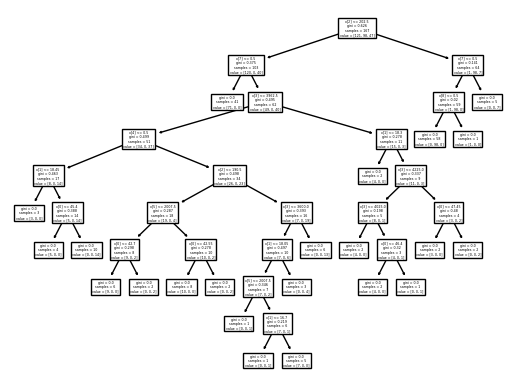

In [46]:
tree.plot_tree(random.estimators_[0])

In [47]:
X.iloc[0]

bill_length_mm        39.1
bill_depth_mm         18.7
flipper_length_mm      181
body_mass_g           3750
sex                      0
year                  2007
island_Biscoe        False
island_Dream         False
island_Torgersen      True
Name: 0, dtype: object

In [48]:
data_user = [[39.1,18.7,181,3750,0,2007,0,0,1]]

In [50]:
ans=random.predict(data_user)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [51]:
ans

array([0])